In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, Draw
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from modSAR.datasource import ChEMBLApiDataSource

/opt/conda/lib/python3.6/site-packages/grequests.py:21: MonkeyPatchWarning: Monkey-patching ssl after ssl has already been imported may lead to errors, including RecursionError on Python 3.6. It may also silently lead to incorrect behaviour on Python 3.7. Please monkey-patch earlier. See https://github.com/gevent/gevent/issues/1016. Modules that had direct imports (NOT patched): ['urllib3.util (/opt/conda/lib/python3.6/site-packages/urllib3/util/__init__.py)', 'urllib3.contrib.pyopenssl (/opt/conda/lib/python3.6/site-packages/urllib3/contrib/pyopenssl.py)']. 
  curious_george.patch_all(thread=False, select=False)


# Acquiring Data from ChEMBL

In [2]:
chembl_data_source = ChEMBLApiDataSource(target_id='CHEMBL202', standard_types=['IC50', 'Ki'])
result_df = chembl_data_source.bioactivities_df

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [5]:
chembl_data_source

ChEMBLApiDataSource object
  target_id: CHEMBL202
  bioactivities: 1573
  standard_types: ['Ki' 'IC50' 'Log 1/Ki app' 'IC50/[E]' 'Ratio IC50']

In [6]:
result_df['standard_type'].value_counts()

IC50            1090
Ki               435
Log 1/Ki app      38
IC50/[E]           8
Ratio IC50         2
Name: standard_type, dtype: int64

# Preprocessing

## Select only valid relations

In [7]:
result_df['relation'].value_counts()

=     1346
>      155
<        5
<=       1
~        1
Name: relation, dtype: int64

In [8]:
result_df = result_df[result_df['relation'] == '=']

## Remove possible experimental outliers 

In [13]:
result_df['data_validity_comment'].value_counts()

Outside typical range            59
Potential transcription error     4
Name: data_validity_comment, dtype: int64

In [14]:
result_df['data_validity_comment'].isnull().sum()

1283

In [15]:
result_df = result_df[result_df['data_validity_comment'].isnull()]

## Remove data that does not have a valid pIC50

In [10]:
result_df['pchembl_value'].isnull().sum()

335

In [ ]:
result_df = result_df[~result_df['pchembl_value'].isnull()]

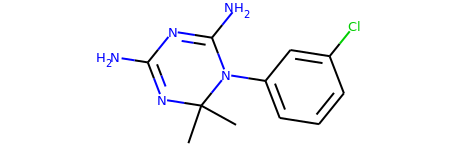

In [23]:
m = Chem.MolFromSmiles(result_df.iloc[0]['canonical_smiles'])
m

In [26]:
AllChem.CalcKappa1(m)

11.72715976331361

In [6]:
result_df.columns.tolist()

['activity_comment',
 'activity_id',
 'assay_chembl_id',
 'assay_description',
 'assay_type',
 'bao_endpoint',
 'bao_format',
 'bao_label',
 'canonical_smiles',
 'data_validity_comment',
 'data_validity_description',
 'document_chembl_id',
 'document_journal',
 'document_year',
 'ligand_efficiency',
 'molecule_chembl_id',
 'molecule_pref_name',
 'parent_molecule_chembl_id',
 'pchembl_value',
 'potential_duplicate',
 'published_relation',
 'published_type',
 'published_units',
 'published_value',
 'qudt_units',
 'record_id',
 'relation',
 'src_id',
 'standard_flag',
 'standard_relation',
 'standard_text_value',
 'standard_type',
 'standard_units',
 'standard_upper_value',
 'standard_value',
 'target_chembl_id',
 'target_organism',
 'target_pref_name',
 'target_tax_id',
 'text_value',
 'toid',
 'type',
 'units',
 'uo_units',
 'upper_value',
 'value']